In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='3f962a2b-4076-4699-84d8-3e1541a1ce94', project_access_token='')
pc = project.project_context

# Data reader installation 

In [2]:
# Fetch the library file
 with open("pandas-datareader-0.7.4.tar.gz","wb") as f:
     f.write(project.get_file("pandas-datareader-0.7.4.tar.gz").read())

 # Install the library
 !pip install pandas-datareader-0.7.4.tar.gz

Processing ./pandas-datareader-0.7.4.tar.gz
  Stored in directory: /home/dsxuser/.cache/pip/wheels/8c/3d/57/b430a5f3e93d0d9da59adcdee01b9ff1c26b7544c1dc9e8937
Successfully built pandas-datareader


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import datetime 
from datetime import datetime, date

### Import data  oil brent price FED data from quandl 

In [4]:
import  pandas_datareader as web

In [5]:

oil_v = web.DataReader('FRED/DCOILBRENTEU', 'quandl', '2003', 'today', access_key = "r5fSxorqmVBeuxb9NsFN" ) 


### Import wated average Rub value  from Moscow Exchange 

In [6]:
r_val = web.DataReader('USD000UTSTOM', 'moex', start='2003', end='today')# RUB value Moscow EX



In [7]:
 r_val = r_val['WAPRICE']
 

In [8]:
rub_vs_oil =pd.merge(oil_v, r_val , left_index=True, right_index=True )# merge 2 dataframes

In [9]:
rub_vs_oil.replace(0, np.nan, inplace = True) # replace 0 by NAN

In [10]:
rub_vs_oil.dropna(subset=["WAPRICE"], axis=0, inplace=True) 


In [11]:
rub_vs_oil= rub_vs_oil.rename(columns = {'Value':'Oil_price', 'WAPRICE':'RUB_value'}) # rename  columns 

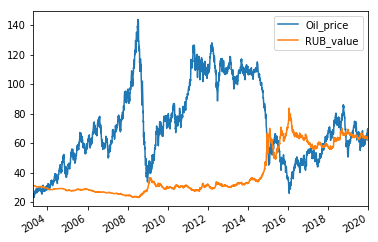

In [12]:
rub_vs_oil.plot()# plot RUB vs OIL brent price 

## RUB & Oil price  correlation 

In [13]:
rub_vs_oil.corr()['RUB_value'].sort_values()

Oil_price   -0.351342
RUB_value    1.000000
Name: RUB_value, dtype: float64

## Plot RUB & OIL price , Pearson Correlation

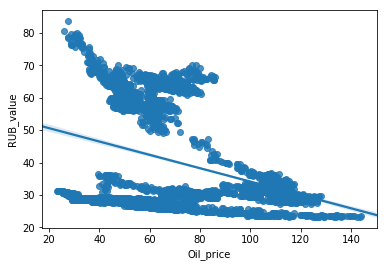

In [14]:
sns.regplot(x="Oil_price", y="RUB_value", data=rub_vs_oil)

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Coefficient of determination, R squared

In [16]:
X = rub_vs_oil[['Oil_price']]
Y = rub_vs_oil['RUB_value']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)
print ("R^2 = ", lm.score(X, Y))

R^2 =  0.12344089092405708


In [17]:
x =rub_vs_oil ['Oil_price']
y = rub_vs_oil['RUB_value']

In [18]:
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p, " - the polynomial function")

          2
-0.00386 x + 0.388 x + 34.77  - the polynomial function


In [19]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polinomal fit price of oil vs RUB value')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('RUB_value')

    plt.show()
    plt.close()

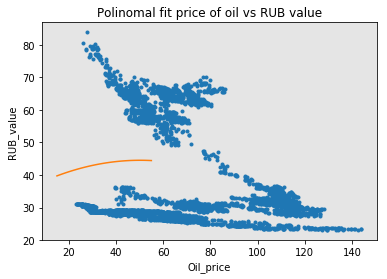

In [20]:
PlotPolly(p, x, y, 'Oil_price')

In [21]:
r_squared = r2_score(y, p(x))
print(  r_squared*100,"% of the variation of Ruble is explained by this polynomial fit")

15.37896968981407 % of the variation of Ruble is explained by this polynomial fit


In [22]:
from pandas_datareader import data

# Import USO share price 

In [23]:
USO = data.DataReader("USO", 
                       start='2003', 
                       end='today', 
                       data_source='yahoo')

In [24]:
USO = USO ['Close']


In [25]:
    m_data1 = USO.isnull()

In [26]:
rub_vs_oil3 =pd.merge(rub_vs_oil, USO , left_index=True, right_index=True )

In [27]:
rub_vs_oil3= rub_vs_oil3.rename(columns = {'Close':'USO_price'})

In [28]:
rub_vs_oil3.corr()['RUB_value'].sort_values()

USO_price   -0.809947
Oil_price   -0.628508
RUB_value    1.000000
Name: RUB_value, dtype: float64

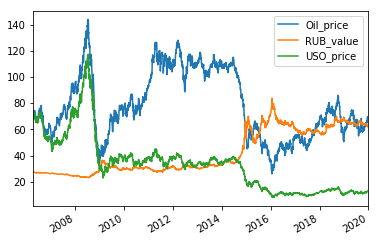

In [29]:
rub_vs_oil3.plot()

In [30]:
x =rub_vs_oil3 ['USO_price']
y = rub_vs_oil3['RUB_value']

In [31]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

In [32]:
print (p, "- the polinomal function ")

            3           2
-0.0001589 x + 0.03685 x - 2.751 x + 90.98 - the polinomal function 


In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polinomal fit price of USO vs RUB value')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('RUB_value')

    plt.show()
    plt.close()
    

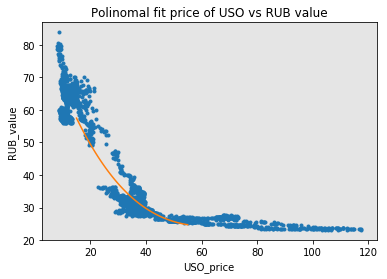

In [34]:
PlotPolly(p, x, y, 'USO_price')

In [35]:
data = pd.DataFrame({'year': [], 'r_squared': [],'pearson_corr': [] })


In [36]:
for i  in range (2006, 2020):
    b=str(i)
    df = rub_vs_oil3[b]
    x =df['USO_price']
    y = df['RUB_value']
    f = np.polyfit(x, y, 3)
    p = np.poly1d(f)
    r_squared = r2_score(y, p(x))
    p_corr= df['RUB_value' ].corr(df['USO_price'])
    data =data.append ({'year':b, 'r_squared':r_squared,'pearson_corr':p_corr },ignore_index=True)
    #print (b, r_squared)
    #print ( "Y", b, p_corr ) 
    

In [37]:
data.corr()

,r_squared,pearson_corr
r_squared,1.000000,-0.776154
pearson_corr,-0.776154,1.000000


### Datafarme  R_squared and Pearson correlation 2006-2020

In [38]:
data

,year,r_squared,pearson_corr
0,2006,0.382955,0.617264
1,2007,0.920358,-0.952774
2,2008,0.887322,-0.917543
3,2009,0.835516,-0.912496
4,2010,0.594910,-0.747006
5,2011,0.304799,-0.542038
6,2012,0.557004,-0.726003
7,2013,0.271121,0.503659
8,2014,0.930126,-0.942694
9,2015,0.674859,-0.803885


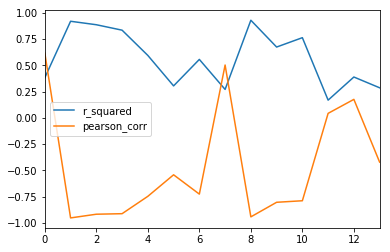

In [39]:
data.plot()

In [40]:
data.sum()

year            2.006201e+55
r_squared       7.968232e+00
pearson_corr   -6.414717e+00
dtype: float64